In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
fs_df = pd.read_pickle('../data/fs_df.pkl')
cs5_df = pd.read_pickle('../data/cs5_df.pkl')
cs6_df = pd.read_pickle('../data/cs6_df.pkl')
fs_df = fs_df.drop(columns=['REQMEM','REQTIME'])

In [3]:
cs5_df[cs5_df['RETURNCODE'] == 1].shape

(1811, 4)

In [4]:
cs6_df[cs6_df['RETURNCODE'] == 1].shape

(1485, 4)

In [5]:
cs5_ts = pd.Series(1, index=list(cs5_df['TIME']))
cs5_resample = cs5_ts.resample('D').sum()

cs5_error_ts = pd.Series(list(cs5_df['RETURNCODE']), index=list(cs5_df['TIME']))
cs5_error_resample = cs5_error_ts.resample('D').sum()

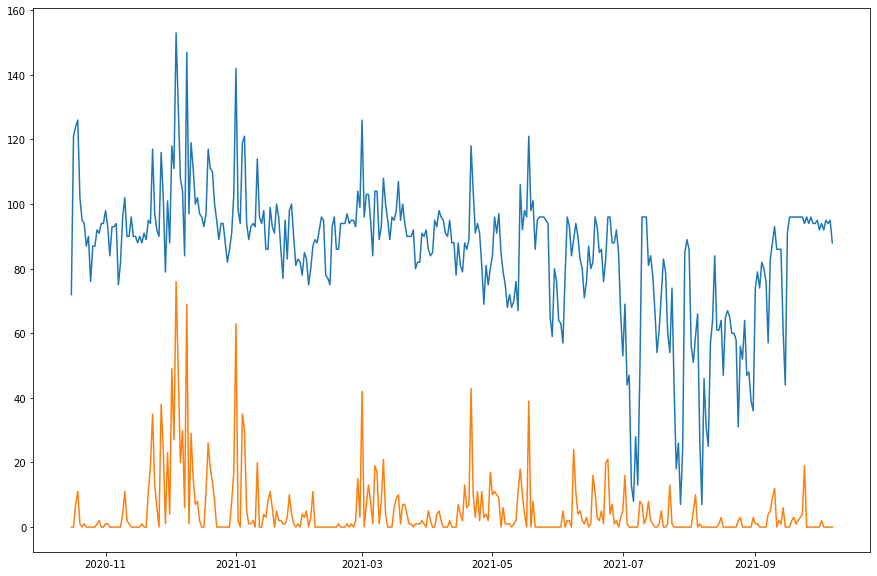

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(cs5_resample.index, cs5_resample)
plt.plot(cs5_error_resample.index, cs5_error_resample)

In [7]:
y=cs5_error_resample
X=cs5_resample
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.295
Model:                            OLS   Adj. R-squared (uncentered):              0.293
Method:                 Least Squares   F-statistic:                              149.0
Date:                Tue, 26 Oct 2021   Prob (F-statistic):                    7.23e-29
Time:                        20:21:48   Log-Likelihood:                         -1308.0
No. Observations:                 357   AIC:                                      2618.
Df Residuals:                     356   BIC:                                      2622.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0697      0.006     12.207      0.000       0.058       0.081
==============================================================================
Omnibus:                      299.727   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4712.006
Skew:                           3.584   Prob(JB):                         0.00
Kurtosis:                      19.291   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

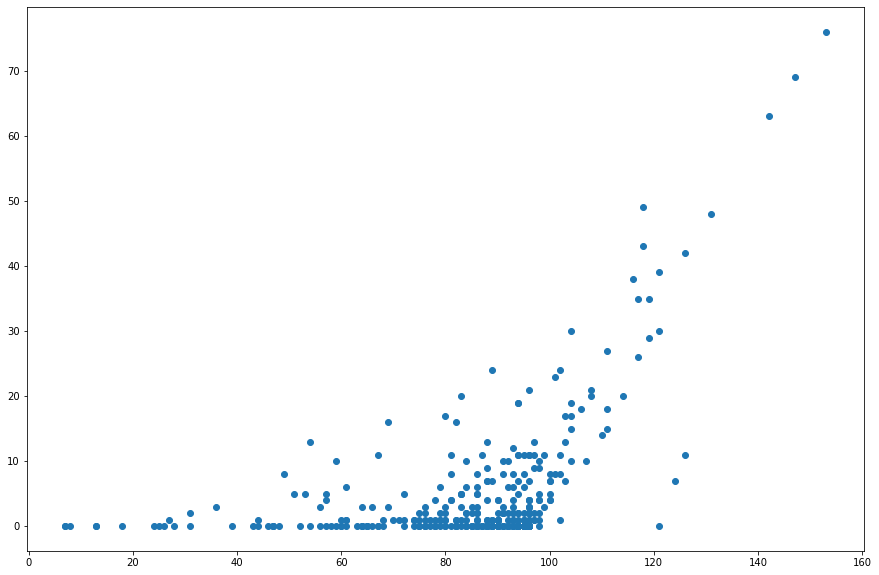

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(cs5_resample, cs5_error_resample)